In [1]:
import pennylane as qml
from pennylane import numpy as np

# Define number of qubits and device

In [2]:
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# A simple (non-parametrized) quantum circuit

In [3]:
@qml.qnode(dev)
def simple_circuit():
    qml.Y(wires=1)
    qml.CNOT(wires=[1,0])
    return qml.expval(qml.PauliZ(0)) # result is between -1 and 1

Result (non-parametrized): -1.0


(<Figure size 500x300 with 1 Axes>, <Axes: >)

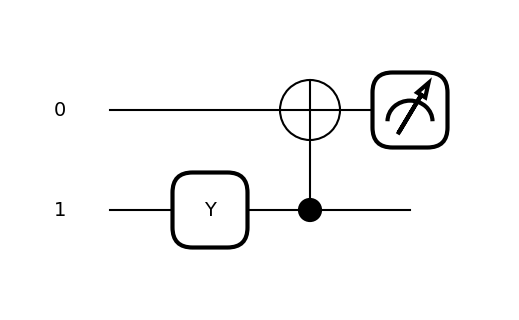

In [4]:
# Run the circuit
result = simple_circuit()
print("Result (non-parametrized):", result)
qml.draw_mpl(simple_circuit)()

In [5]:
@qml.qnode(dev)
def simple_circuit_2():
    qml.Y(wires=1)
    qml.Y(wires=0)
    qml.CNOT(wires=[1,0])
    return qml.expval(qml.PauliZ(0)) # result is between -1 and 1

Result (non-parametrized): 1.0


(<Figure size 500x300 with 1 Axes>, <Axes: >)

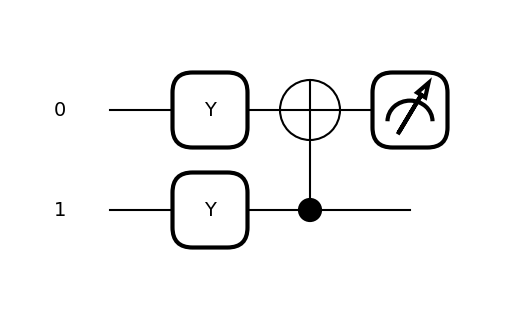

In [6]:
# Run the circuit
result = simple_circuit_2()
print("Result (non-parametrized):", result)
qml.draw_mpl(simple_circuit_2)()

# A parametrized quantum circuit

In [17]:
n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits)
#dev = qml.device("default.qubit", wires=n_qubits, shots=1)

@qml.qnode(dev)
def parametrized_circuit(theta1, theta2, theta3):
    qml.RY(theta1, wires=0)
    qml.RY(theta2, wires=1)
    qml.RY(theta3, wires=2)
    
    qml.CNOT(wires=[2,1])
    qml.CNOT(wires=[1,0])
    return qml.expval(qml.PauliZ(0))

Result (parametrized): 0.67488


(<Figure size 600x400 with 1 Axes>, <Axes: >)

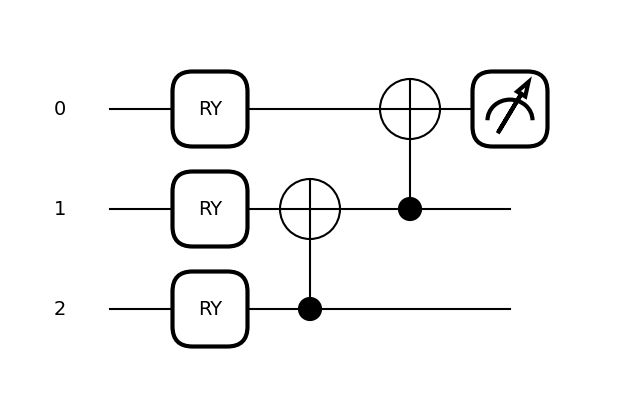

In [18]:
# Try with some values
theta1 = np.pi / 6
theta2 = np.pi / 5
theta3 = np.pi / 12

result = parametrized_circuit(theta1, theta2, theta3)
print("Result (parametrized):", result)

qml.draw_mpl(parametrized_circuit)(theta1, theta2, theta3)

In [13]:
# we can also split up the qnode

# first part of circuit
def first_circuit(theta):
    qml.RY(theta[0], wires=0)
    qml.RY(theta[1], wires=1)
    qml.RY(theta[2], wires=2)

# second part of circuit
def second_circuit():
    qml.CNOT(wires=[2,1])
    qml.CNOT(wires=[1,0])


@qml.qnode(dev)
def parametrized_circuit_2(theta):
    first_circuit(theta)
    second_circuit()
    return qml.expval(qml.PauliZ(0))

Result (parametrized): 0.3907252043867599


(<Figure size 600x400 with 1 Axes>, <Axes: >)

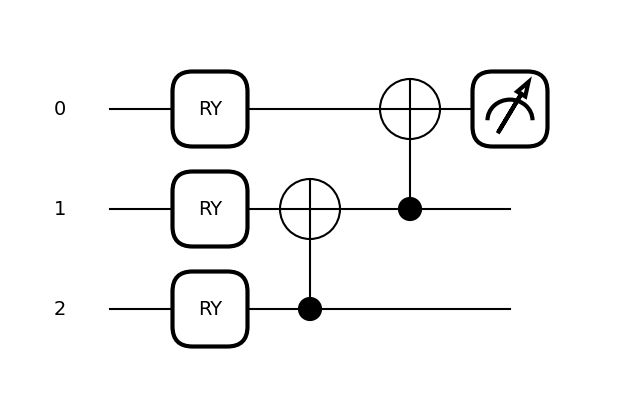

In [14]:
# Try with some values
theta1 = np.pi / 3
theta2 = np.pi / 5
theta3 = np.pi / 12

result = parametrized_circuit_2([theta1, theta2, theta3])
print("Result (parametrized):", result)

qml.draw_mpl(parametrized_circuit_2)([theta1, theta2, theta3])